In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_excel(r"C:\Users\nehas\OneDrive\Desktop\datasets\LungCap.xls")
data

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no
...,...,...,...,...,...,...
720,5.725,9,56.0,no,female,no
721,9.050,18,72.0,yes,male,yes
722,3.850,11,60.5,yes,female,no
723,9.825,15,64.9,no,female,no


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data.dtypes


LungCap(cc)       float64
Age( years)         int64
Height(inches)    float64
Smoke              object
Gender             object
Caesarean          object
dtype: object

In [4]:
data.head()

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [5]:
data.tail()

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean
720,5.725,9,56.0,no,female,no
721,9.050,18,72.0,yes,male,yes
722,3.850,11,60.5,yes,female,no
723,9.825,15,64.9,no,female,no
724,7.100,10,67.7,no,male,no


In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.Smoke=le.fit_transform(data.Smoke)
data.Gender=le.fit_transform(data.Gender)
data.Caesarean=le.fit_transform(data.Caesarean)

In [7]:
data.columns

Index(['LungCap(cc)', 'Age( years)', 'Height(inches)', 'Smoke', 'Gender',
       'Caesarean'],
      dtype='object')

In [8]:
data=data.rename(columns={"LungCap(cc)":"LungCap"})
data=data.rename(columns={"Age( years)":"Age"})
data=data.rename(columns={"Height(inches)":"Height"})

In [9]:
data.isnull().sum()

LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64

In [10]:
lc=data["LungCap"]

In [11]:
#detecting the outliers
#1 method
outlier=[]
def detect_outlier(lc):
    threshold=3
    mean=np.mean(lc)
    std=np.std(lc)
    for i in lc:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outlier.append(i)
    return outlier

In [12]:
detect_outlier(lc)

[]

In [13]:
#2 method
def remove_outliers(df,col,k=3):
    mean=df[col].mean()
    global df1
    sd=df[col].std()
    final_list=[x for x in df[col] if (x>mean-k*sd)]
    final_list=[x for x in df[col] if (x<mean+k*sd)]
    df1=df.loc[df[col].isin(final_list)]
    print(df1.shape);return(df1)

In [14]:
#remove_outliers(data,"LungCap",k=3)

<Axes: xlabel='LungCap', ylabel='Density'>

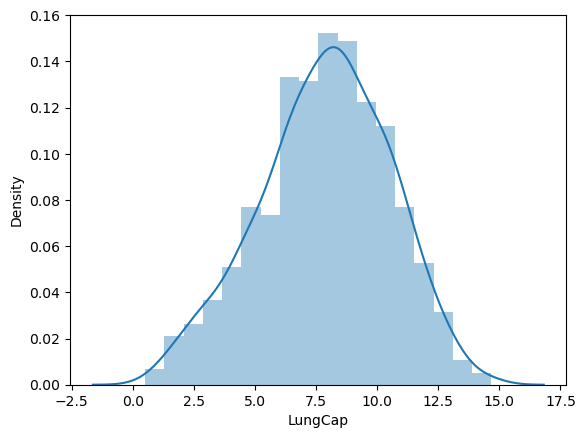

In [15]:
sns.distplot(data["LungCap"])

In [16]:
data["LungCap"].describe()

count    725.000000
mean       7.863148
std        2.662008
min        0.507000
25%        6.150000
50%        8.000000
75%        9.800000
max       14.675000
Name: LungCap, dtype: float64

In [17]:
up=data["LungCap"].mean()+2.5*data["LungCap"].std()
lp=data["LungCap"].mean()-2.5*data["LungCap"].std()
print(up,lp)

14.518168207903692 1.2081269645100976


In [18]:
#data.loc[data["LungCap"]>14.518,"LungCap"]=14.518
#data.loc[data["LungCap"]<1.20,"LungCap"]=1.20

<Axes: xlabel='LungCap', ylabel='Density'>

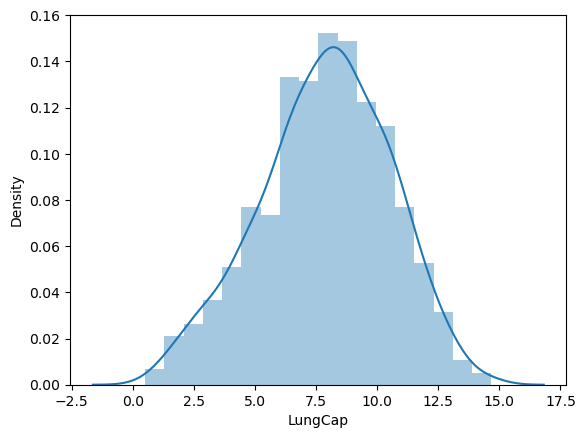

In [19]:
sns.distplot(data["LungCap"])

In [20]:
#outliers tretment for skwed data

<Axes: ylabel='LungCap'>

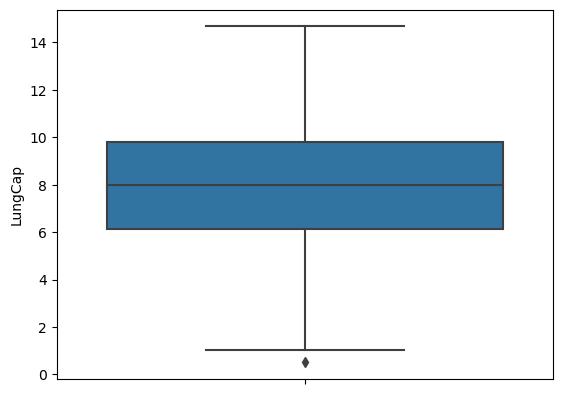

In [21]:
sns.boxplot(data=data,y="LungCap")

In [22]:
IQR=data["LungCap"].quantile(0.75)-data["LungCap"].quantile(0.25)
IQR

3.6500000000000004

In [23]:
lb1=data["LungCap"].quantile(0.25)-(IQR*3)
ub1=data["LungCap"].quantile(0.75)+(IQR*3)
print(lb1,ub1)

-4.800000000000001 20.75


In [24]:
data.loc[data["LungCap"]>20.75,"LungCap"]=20.75

<Axes: ylabel='LungCap'>

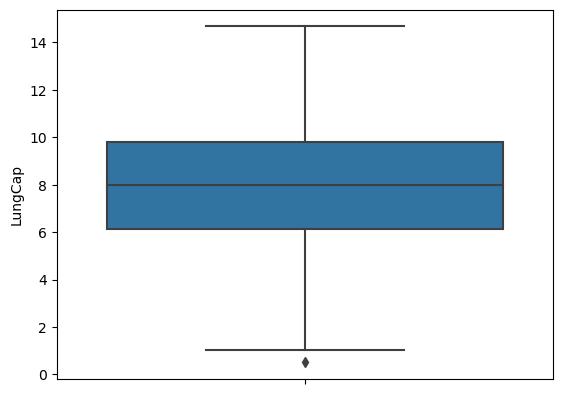

In [25]:
sns.boxplot(data=data,y="LungCap")

<Axes: xlabel='LungCap', ylabel='Density'>

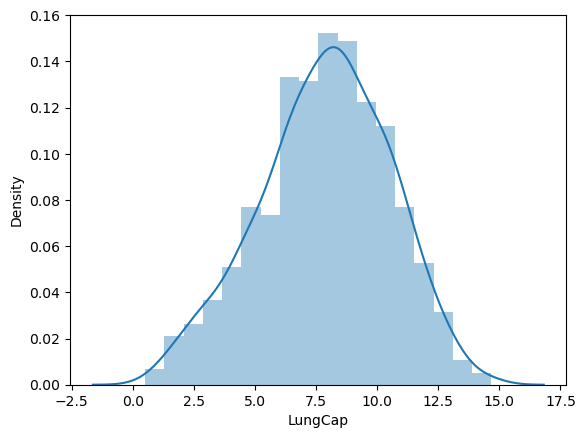

In [26]:
sns.distplot(data["LungCap"])